In [118]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [119]:
with open('data/day8_input.txt') as f:
    lines = f.readlines()

In [120]:
print(lines)

['313213123212200312011243203120214010202554420335045116203101005212525131015305511140012431022113113\n', '222021333112322244231542054023354511304431216312534453560105660253445311020244233130144313440030322\n', '200012220300132310233100025524032003355144536126232161330106115213441450552235514000243120210031130\n', '102111124044033113241415155401056014506203413216651520206613342353052505445000321043121021430440021\n', '221134021010031320101542213340113552161113350123516154134654046250223033000413443321231233142213010\n', '112241233114245202523201433013460320664034202602144006022621253536213222400131120345151014014131133\n', '132211130114141401325141212460540656525106651152012063404633651340223361443201520054113541144043031\n', '323140320024314005210155316202152552621415660063112177564603241212312025036551350313225504314404112\n', '014013242041230510442265205625331115540222744516266167254216354043533020346502032534231121044441220\n', '23341403010131525533512605526314451211177746461156521

In [121]:
lines = ['30373\n',
        '25512\n',
        '65332\n',
        '33549\n',
        '35390\n']

In [122]:
lines = [[*line] for line in lines]

In [123]:
data_list = []
x = 0
y = 0
while x < len(lines):
    for line in lines[x]:
        for num in line:
            if line == '\n':
                continue
            data_list.append({'val':int(line), 'xcoord':x, 'ycoord':y})
            y += 1    
    x += 1
    y=0

In [124]:
df = pd.DataFrame(data_list)

In [125]:
geometry = [Point(xy) for xy in zip(df.xcoord, df.ycoord)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [126]:
gdf.head()

,val,xcoord,ycoord,geometry
0,3,0,0,POINT (0.00000 0.00000)
1,0,0,1,POINT (0.00000 1.00000)
2,3,0,2,POINT (0.00000 2.00000)
3,7,0,3,POINT (0.00000 3.00000)
4,3,0,4,POINT (0.00000 4.00000)


<AxesSubplot:>

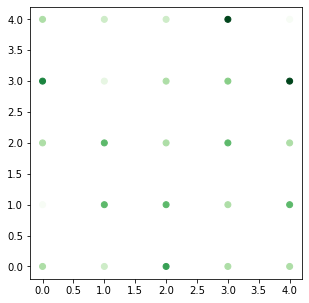

In [137]:
gdf.plot('val', cmap = 'Greens', figsize=(5,5))

In [128]:
where = ((df['xcoord']==min(df['xcoord'])) | 
         (df['xcoord']== max(df['xcoord'])) |
         (df['ycoord']==min(df['ycoord'])) |
         (df['ycoord']==max(df['ycoord'])))

In [129]:
df['visible'] = np.where(where, True, False)

<AxesSubplot:>

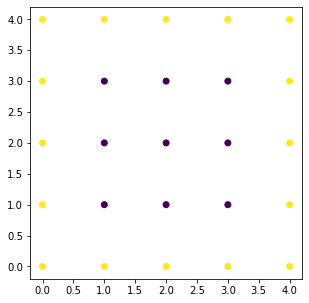

In [138]:
gdf.plot('visible', figsize=(5,5))

In [139]:
row_ = None
for i, row in gdf.iterrows():
    if row['ycoord'] == 2:
        if row_ is None:
            row_ = row
            continue
        cur = row['val']
        prev = row_['val']
        print(f'cur:{cur} prev:{prev}')
        print(cur > prev)
        if cur > prev:
            visible = True
            gdf.loc[i, 'visible'] = True
        else:
            break
        row_ = row

row_ is none
cur:5 prev:3
True
True
cur:3 prev:5
False
